# Certificacion Profesional de Analisis de Datos
## Caso Aplicado  - Cyclistic
### Elaborado por : Rodrigo Escallon

# Importar Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargue de los datos
## Ultimos 12 meses del proyecto Cyclistic

Fuente de datos : https://divvy-tripdata.s3.amazonaws.com/index.html

In [2]:
df1 = pd.read_csv('202208-divvy-tripdata.csv')
df2 = pd.read_csv('202209-divvy-tripdata.csv')
df3 = pd.read_csv('202210-divvy-tripdata.csv')
df4 = pd.read_csv('202211-divvy-tripdata.csv')
df5 = pd.read_csv('202212-divvy-tripdata.csv')
df6 = pd.read_csv('202301-divvy-tripdata.csv')
df7 = pd.read_csv('202302-divvy-tripdata.csv')
df8 = pd.read_csv('202303-divvy-tripdata.csv')
df9 = pd.read_csv('202304-divvy-tripdata.csv')
df10 = pd.read_csv('202305-divvy-tripdata.csv')
df11 = pd.read_csv('202306-divvy-tripdata.csv')
df12 = pd.read_csv('202307-divvy-tripdata.csv')


# Se consolidan todos los dataset en un solo archivo

In [3]:
df= pd.concat([df1,df2])
df= pd.concat([df,df3])
df= pd.concat([df,df4])
df= pd.concat([df,df5])
df= pd.concat([df,df6])
df= pd.concat([df,df7])
df= pd.concat([df,df8])
df= pd.concat([df,df9])
df= pd.concat([df,df10])
df= pd.concat([df,df11])
df= pd.concat([df,df12])

# Explorando un poco el nuevo dataset

In [4]:
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.93,-87.69,41.94,-87.72,casual
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.89,-87.64,41.92,-87.64,casual
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.97,-87.69,41.97,-87.66,casual
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.94,-87.65,41.97,-87.69,casual
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.85,-87.65,41.84,-87.66,casual


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5723606 entries, 0 to 767649
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 611.3+ MB


,start_lat,start_lng,end_lat,end_lng
count,5.723606e+06,5.723606e+06,5.717504e+06,5.717504e+06
mean,4.190296e+01,-8.764758e+01,4.190318e+01,-8.764763e+01
std,4.540914e-02,2.800641e-02,7.173348e-02,1.192788e-01
min,4.164000e+01,-8.792000e+01,0.000000e+00,-8.816000e+01
25%,4.188103e+01,-8.766106e+01,4.188103e+01,-8.766136e+01
50%,4.189999e+01,-8.764414e+01,4.190000e+01,-8.764434e+01
75%,4.193000e+01,-8.763000e+01,4.193000e+01,-8.763000e+01
max,4.207000e+01,-8.752000e+01,4.218000e+01,0.000000e+00


# Manipulacion y limpieza de datos

In [6]:
# se convierten las columnas started_at y ended_at en tipo fecha hr 
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [7]:
#Se crea una nueva columna que se llama  ride_length calculando la diferencia entre ended at y started at

df['ride_length_seconds'] = (df['ended_at'] - df['started_at']).dt.total_seconds()


In [8]:
# Convierte la duración del viaje en formato HH:MM:SS
df['ride_length'] = df['ride_length_seconds'].apply(lambda x: pd.to_datetime(x, unit='s').strftime('%H:%M:%S'))

In [9]:
df['day_of_week'] = df['started_at'].dt.day_name()

In [10]:
df['month'] = df['started_at'].dt.month_name()

In [11]:
# visualizamos nuevamente el data set con las nuevas columnas
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_seconds,ride_length,day_of_week,month
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.93,-87.69,41.94,-87.72,casual,451.0,00:07:31,Sunday,August
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.89,-87.64,41.92,-87.64,casual,842.0,00:14:02,Monday,August
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.97,-87.69,41.97,-87.66,casual,644.0,00:10:44,Monday,August
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.94,-87.65,41.97,-87.69,casual,903.0,00:15:03,Monday,August
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.85,-87.65,41.84,-87.66,casual,352.0,00:05:52,Sunday,August


In [ ]:
#Exportando el nuevo dataframe en un archivo llamado consolidado
df.to_csv('Cyclistic_consolidated.csv', index=False)

# Analisis de datos

In [50]:
==data = pd.read_csv('Cyclistic_consolidated.csv')

<AxesSubplot:>

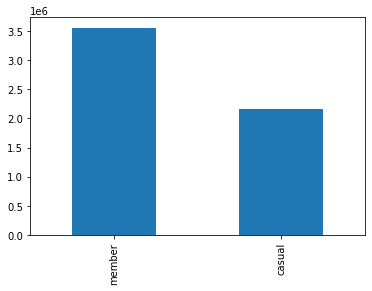

In [13]:
data.member_casual.value_counts().plot.bar()

<AxesSubplot:>

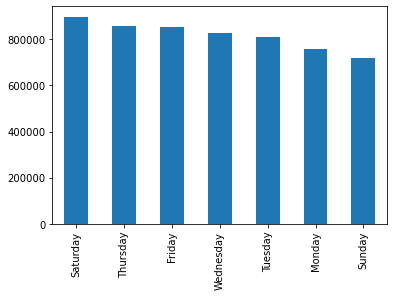

In [5]:
data.day_of_week.value_counts().plot.bar()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723606 entries, 0 to 5723605
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ride_id              object 
 1   rideable_type        object 
 2   started_at           object 
 3   ended_at             object 
 4   start_station_name   object 
 5   start_station_id     object 
 6   end_station_name     object 
 7   end_station_id       object 
 8   start_lat            float64
 9   start_lng            float64
 10  end_lat              float64
 11  end_lng              float64
 12  member_casual        object 
 13  ride_length_seconds  float64
 14  ride_length          object 
 15  day_of_week          object 
 16  month                object 
dtypes: float64(5), object(12)
memory usage: 742.4+ MB


In [ ]:
#%timeit df.astype('float64').mean()
#1 loops, best of 3: 9.45 s per loop

In [51]:
mean_ride_length = data['ride_length_seconds'].mean()
print("el tiempo promedio de los viajes es: ",mean_ride_length/60," Minutos")

max_ride_length = data['ride_length_seconds'].max()
print("El viaje mas largo es de: ",max_ride_length/60," Minutos")

min_ride_length = data['ride_length_seconds'].min()
print("El viaje mas corto es de: ",min_ride_length/60," Minutos")


el tiempo promedio de los viajes es:  18.357022198942413  Minutos
El viaje mas largo es de:  51461.4  Minutos
El viaje mas corto es de:  -10353.35  Minutos


al verificar esta informacion encontramos viajes en negativo, lo cual no tendria sentido para el analisis

In [18]:
data = data.loc[data['ride_length_seconds'] >= 0]

In [52]:
mean_ride_length = data['ride_length_seconds'].mean()
print("el tiempo promedio de los viajes es: ",mean_ride_length/60," Minutos")

max_ride_length = data['ride_length_seconds'].max()
print("El viaje mas largo es de: ",max_ride_length/60," Minutos")

min_ride_length = data['ride_length_seconds'].min()
print("El viaje mas corto es de: ",min_ride_length/60," Minutos")


el tiempo promedio de los viajes es:  18.357022198942413  Minutos
El viaje mas largo es de:  51461.4  Minutos
El viaje mas corto es de:  -10353.35  Minutos


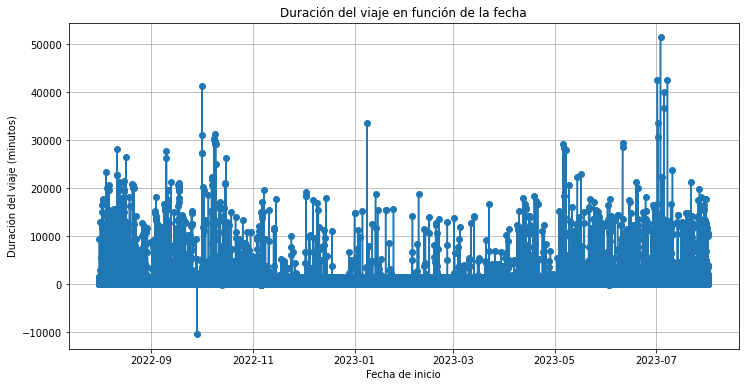

In [53]:
# Convierte la columna "started_at" al formato datetime si aún no está en ese formato
data['started_at'] = pd.to_datetime(data['started_at'])

# Ordena el DataFrame por la columna "started_at" para asegurarte de que los datos estén en orden cronológico
data = data.sort_values(by='started_at')

# Convierte la duración del viaje de segundos a minutos
data['ride_length_minutes'] = data['ride_length_seconds'] / 60


# Graficar ride_length_seconds en función de la fecha como un gráfico de líneas
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.plot(data['started_at'], data['ride_length_minutes'], linestyle='-', marker='o')  # Gráfico de líneas
plt.title('Duración del viaje en función de la fecha')
plt.xlabel('Fecha de inicio')
plt.ylabel('Duración del viaje (minutos)')
plt.grid(True)
plt.show()

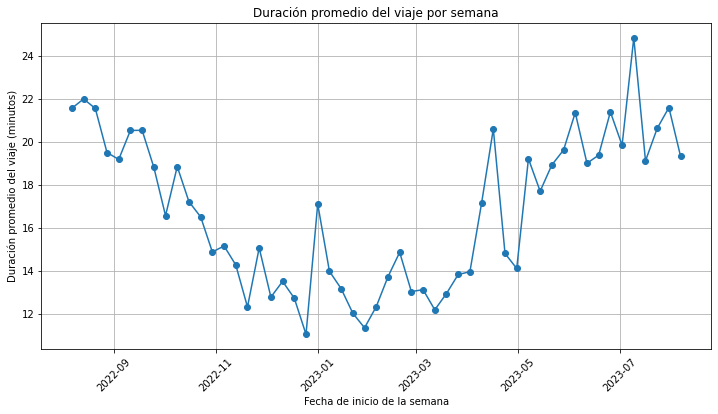

In [54]:
# Agrupa los datos por semana y calcula el promedio de "ride_length_seconds" para cada semana
weekly_data = data.resample('W', on='started_at')['ride_length_seconds'].mean()

# Convierte la duración promedio del viaje de segundos a minutos
weekly_data_minutes = weekly_data / 60  # Divide por 60 para convertir de segundos a minutos

plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.plot(weekly_data_minutes.index, weekly_data_minutes.values, linestyle='-', marker='o')  # Gráfico de líneas
plt.title('Duración promedio del viaje por semana')
plt.xlabel('Fecha de inicio de la semana')
plt.ylabel('Duración promedio del viaje (minutos)')
plt.grid(True)
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para una mejor legibilidad
plt.show()

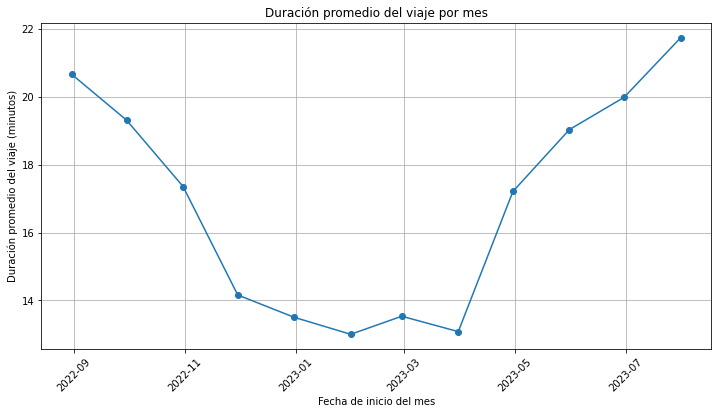

In [88]:
# Agrupa los datos por mes y calcula el promedio de "ride_length_seconds" para cada semana
monthly_data = data.resample('M', on='started_at')['ride_length_seconds'].mean()

# Convierte la duración promedio del viaje de segundos a minutos
monthly_data_minutes = monthly_data / 60  # Divide por 60 para convertir de segundos a minutos

plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.plot(monthly_data_minutes.index, monthly_data_minutes.values, linestyle='-', marker='o')  # Gráfico de líneas
plt.title('Duración promedio del viaje por mes')
plt.xlabel('Fecha de inicio del mes')
plt.ylabel('Duración promedio del viaje (minutos)')
plt.grid(True)
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para una mejor legibilidad
plt.show()

In [71]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5723606 entries, 496243 to 5313321
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ride_id              object        
 1   rideable_type        object        
 2   started_at           datetime64[ns]
 3   ended_at             object        
 4   start_station_name   object        
 5   start_station_id     object        
 6   end_station_name     object        
 7   end_station_id       object        
 8   start_lat            float64       
 9   start_lng            float64       
 10  end_lat              float64       
 11  end_lng              float64       
 12  member_casual        object        
 13  ride_length_seconds  float64       
 14  ride_length          object        
 15  day_of_week          object        
 16  month                object        
 17  ride_length_minutes  float64       
dtypes: datetime64[ns](1), float64(6), object(11)
memory usage

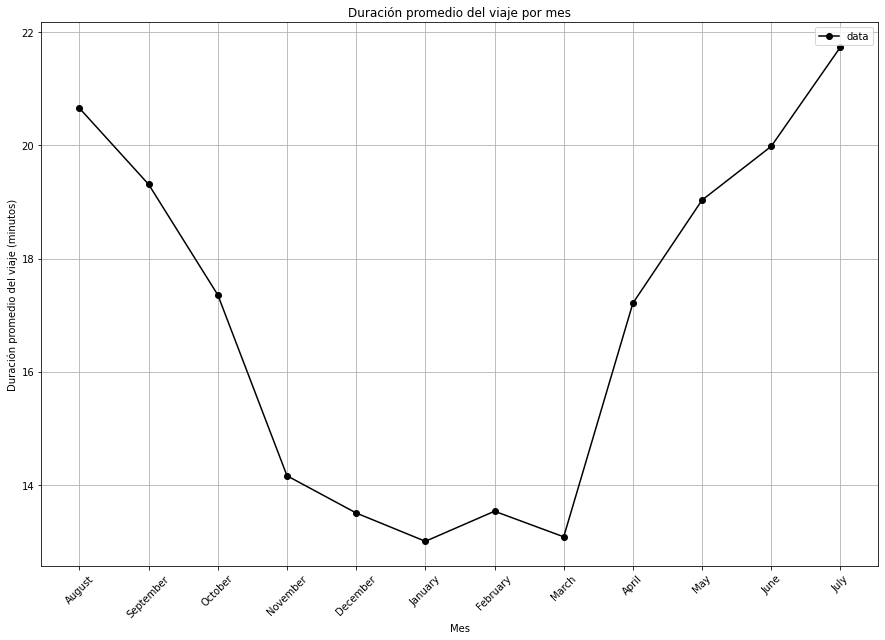

In [103]:
# Agrupa los datos por el mes "month" y calcula el promedio de la duración del viaje en minutos
monthly_data = data.groupby('month')['ride_length_minutes'].mean()

# Ordena los datos por mes
monthly_data = monthly_data.reindex(index=['August', 'September', 'October', 'November', 'December','January', 'February', 'March', 'April', 'May', 'June', 'July'])


# Crear el gráfico
plt.figure(figsize=(15, 10))
plt.plot(monthly_data.index, monthly_data.values, '-o', color='black', label='data')
plt.title('Duración promedio del viaje por mes')
plt.xlabel('Mes')
plt.ylabel('Duración promedio del viaje (minutos)')
plt.grid(True)
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para una mejor legibilidad
plt.legend()
plt.show()

# Visualizacion de datos con PyGWalker

https://pypi.org/project/pygwalker/#description

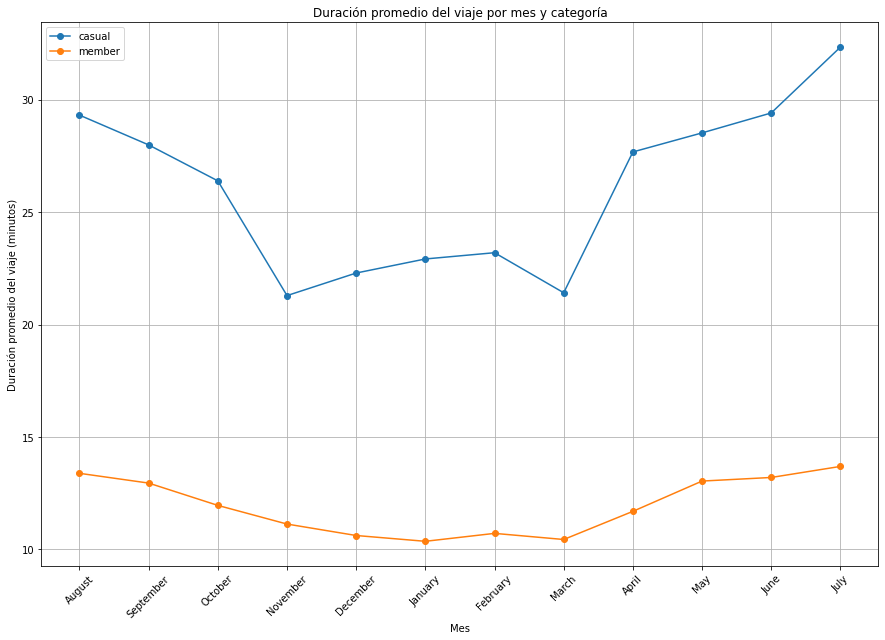

In [104]:
# Agrupa los datos por el mes "Month" y "member_casual" y calcula el promedio de la duración del viaje en minutos
monthly_data = data.groupby(['month', 'member_casual'])['ride_length_minutes'].mean().unstack()


# Crear el gráfico con subplots separados para cada categoría de "member_casual"
fig, ax = plt.subplots(figsize=(15, 10))

# Agrupa los datos por el mes "Month" y "member_casual" y calcula el promedio de la duración del viaje en minutos
monthly_data = data.groupby(['month', 'member_casual'])['ride_length_minutes'].mean().unstack()

# Ordena los datos por mes
monthly_data = monthly_data.reindex(index=['August', 'September', 'October', 'November', 'December','January', 'February', 'March', 'April', 'May', 'June', 'July'])


for member_casual in monthly_data.columns:
    ax.plot(monthly_data.index, monthly_data[member_casual], '-o', label=member_casual)

ax.set_title('Duración promedio del viaje por mes y categoría')
ax.set_xlabel('Mes')
ax.set_ylabel('Duración promedio del viaje (minutos)')
ax.grid(True)
ax.legend()
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para una mejor legibilidad
plt.show()

In [108]:
# Agrupa los datos por la categoría "member_casual" y calcula el promedio de la duración del viaje
promedio_por_categoria = data.groupby('member_casual')['ride_length_minutes'].mean()

# Imprime el promedio de la duración del viaje por categoría
print(promedio_por_categoria)


member_casual
casual    28.142328
member    12.383625
Name: ride_length_minutes, dtype: float64


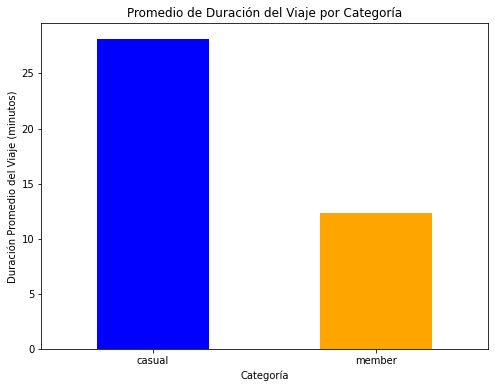

In [114]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
promedio_por_categoria.plot(kind='bar', color=['blue', 'orange'])
plt.title('Promedio de Duración del Viaje por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Duración Promedio del Viaje (minutos)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
print(monthly)